Handling Imbalance of Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged_file.csv', index_col=False)

In [11]:
df

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes
...,...,...
2976,Sometimes truth is glaring you in the face bl...,no
2977,I just love not hanging out with my boyfriend .,no
2978,There is this 1 quince picture I have that I'm...,no
2979,I feel so ill at the moment that I cant speak ...,no


Finding if our dataset has imbalance

In [12]:
y = df['Sarcasm']
y.value_counts()

Sarcasm
yes    1687
no     1294
Name: count, dtype: int64

<Axes: ylabel='count'>

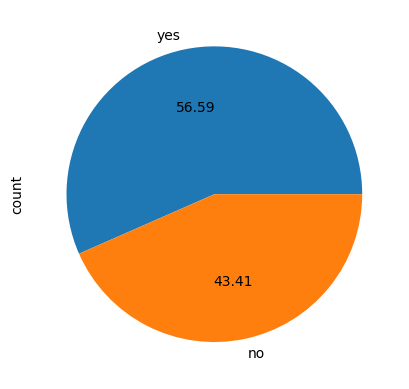

In [13]:
y.value_counts().plot.pie(autopct='%.2f')

Exploring different ways of handling imbalance in dataset



*   Random Undersampling




Sarcasm
no     1294
yes    1294
Name: count, dtype: int64

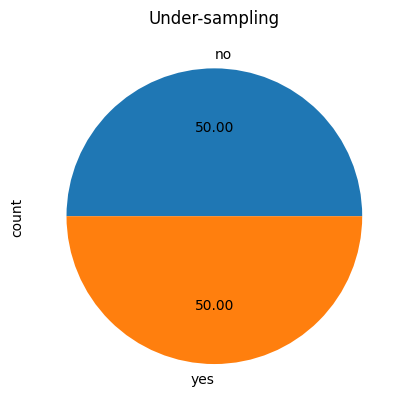

In [14]:
from imblearn.under_sampling import RandomUnderSampler

X = df['Tweet'].values.reshape(-1, 1)
y = df['Sarcasm']

# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
y = df['Sarcasm']
y_res.value_counts()



*   Random Oversampling



In [15]:
y_res.value_counts()

Sarcasm
no     1294
yes    1294
Name: count, dtype: int64

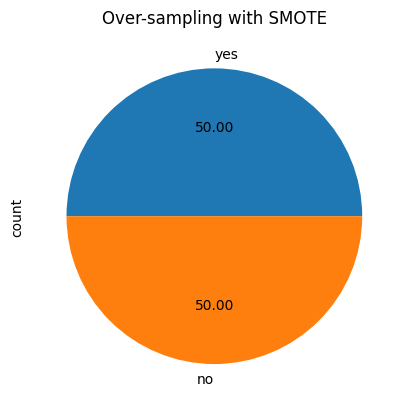

Sarcasm
yes    1687
no     1687
Name: count, dtype: int64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Tweet'])
y = df['Sarcasm']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling with SMOTE")
plt.show()
y_resampled.value_counts()



*   Using Ensembled Technique




1) Balanced Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

              precision    recall  f1-score   support

          no       0.80      0.69      0.74       250
         yes       0.80      0.88      0.84       347

    accuracy                           0.80       597
   macro avg       0.80      0.78      0.79       597
weighted avg       0.80      0.80      0.80       597

Top 20 important features:
am: 0.004915105670024825
it: 0.0049226222300866665
of: 0.0056664076997096
and: 0.005789611285158124
that: 0.005809919086250847
me: 0.005839895824379252
my: 0.006051019848200287
in: 0.006316214439456468
for: 0.006408333907861077
but: 0.006489140176861276
don: 0.00702783120603043
just: 0.007837723370915288
is: 0.008457191890732983
this: 0.008738571558624376
you: 0.009139293089077086
the: 0.010323340364297884
to: 0.023481273256369933
love: 0.02717862791512547
so: 0.054008951313375846
speak: 0.0806973301612709


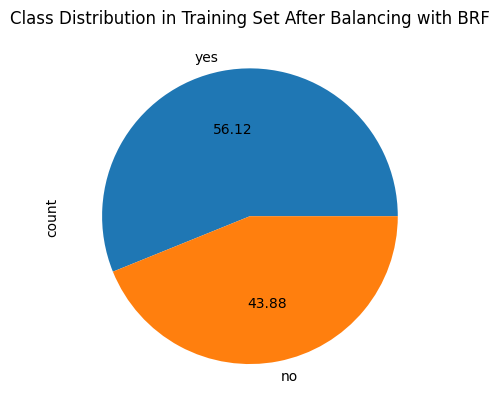

Sarcasm
yes    1338
no     1046
Name: count, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split # Import train_test_split

X = df['Tweet']
y = df['Sarcasm']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Now you can use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply BalancedRandomForestClassifier with explicit sampling_strategy
brf = BalancedRandomForestClassifier(sampling_strategy='auto', random_state=42)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
print(classification_report(y_test, y_pred))

# Display the feature importances
importances = brf.feature_importances_
feature_names = tfidf.get_feature_names_out()
top_n = 20
top_indices = importances.argsort()[-top_n:]

print("Top 20 important features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]}")

y_train_resampled = brf.predict(X_train)
y_train_resampled = pd.Series(y_train_resampled, name='Sarcasm')
ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution in Training Set After Balancing with BRF")
plt.show()
y_train_resampled.value_counts()

2) Easy Ensemble

              precision    recall  f1-score   support

          no       0.75      0.71      0.73       250
         yes       0.80      0.83      0.82       347

    accuracy                           0.78       597
   macro avg       0.78      0.77      0.77       597
weighted avg       0.78      0.78      0.78       597



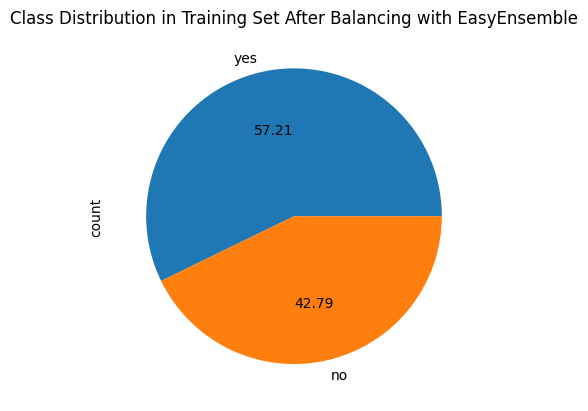

Sarcasm
yes    1364
no     1020
Name: count, dtype: int64

In [18]:
from imblearn.ensemble import EasyEnsembleClassifier

X = df['Tweet']
y = df['Sarcasm']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply EasyEnsembleClassifier with explicit sampling_strategy
eec = EasyEnsembleClassifier(sampling_strategy='auto', random_state=42)
eec.fit(X_train, y_train)

y_pred = eec.predict(X_test)
print(classification_report(y_test, y_pred))

y_train_resampled = eec.predict(X_train)
y_train_resampled = pd.Series(y_train_resampled, name='Sarcasm')
ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution in Training Set After Balancing with EasyEnsemble")
plt.show()
y_train_resampled.value_counts()

Identify Right Evaluation Matrix

1) Confusion Matrix

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

df = pd.read_csv('merged_file.csv')
X = df['Tweet']
y = df['Sarcasm']
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[245 141]
 [ 40 469]]


2) Precision , Recall and F1 Score

In [21]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.86      0.63      0.73       386
         yes       0.77      0.92      0.84       509

    accuracy                           0.80       895
   macro avg       0.81      0.78      0.78       895
weighted avg       0.81      0.80      0.79       895



3)ROC-AUC

In [22]:
# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.8658626586723943


4) Precision-Recall Curve and AUC

In [23]:
# Precision-Recall AUC
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label='yes')
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Precision-Recall AUC: 0.8731669500830495


5) MCC

In [24]:
# Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc}")

MCC: 0.5912091937793609


6)Specificity

In [25]:
# Specificity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Specificity: 0.6347150259067358
